In [ ]:
import matplotlib.pyplot as plt

from src.tools.tools import *
from src.models.statistical.rule_based_functions import *
from src.models.statistical.stationary_models import *

from statsmodels.tsa.statespace.sarimax import SARIMAX

import pandas as pd



df = pd.read_csv('./data/short_seasonal.csv')

df['timestamp'] = pd.to_datetime(df['timestamp'])
ts = df.set_index("timestamp")["value"]
ts = ts.asfreq('ME')

lables = df.set_index("timestamp")["labels"]

In [ ]:
from src.models.preprocessing import create_sliding_windows, np_to_dataloader

g = torch.Generator()
g.manual_seed(13)

windows = create_sliding_windows(ts, window_size=12)
data_loader = np_to_dataloader(windows, batch_size=16, generator=g)


In [18]:
from src.models.self_trained_ml.lstm_ae import LSTMAutoencoder
import torch.optim as optim
import torch.nn as nn

model = LSTMAutoencoder(hidden_dim=8, latent_dim=8)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-1)

In [21]:
from src.models.self_trained_ml.lstm_ae import train_LSTMAE, eval_LTSMAE_MSE
import torch

train_LSTMAE(model, data_loader, criterion=criterion, optimizer=optimizer, epochs=50)
mse_LSTM = eval_LTSMAE_MSE(model, test_data=torch.tensor(windows, dtype=torch.float32).unsqueeze(-1))

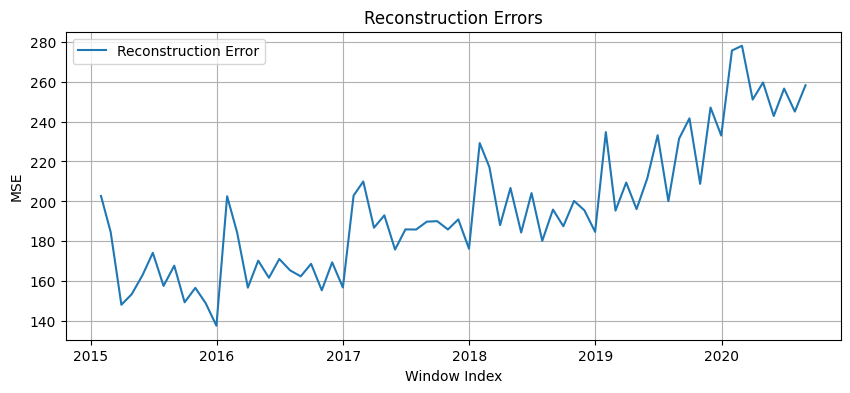

In [22]:
errors_ts = pd.Series(mse_LSTM.numpy(), index=ts.index[:len(ts)-12])

plt.figure(figsize=(10, 4))
plt.plot(errors_ts, label='Reconstruction Error')
# plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')  # Optional
plt.title('Reconstruction Errors')
plt.xlabel('Window Index')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()